## Breast Cancer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline


In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
data.shape

(569, 33)

In [7]:
data.size

18777

In [8]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


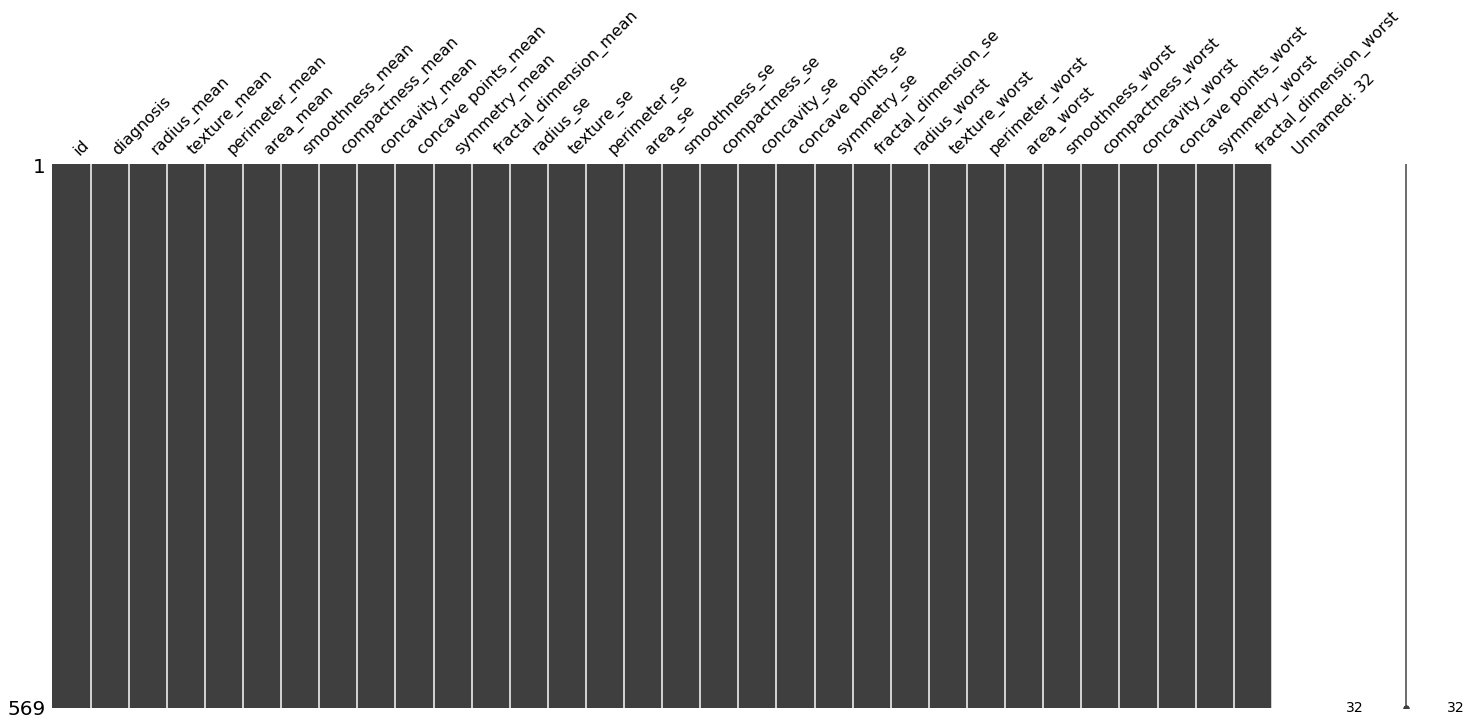

In [10]:
ms.matrix(data)

Text(0.5,1,'data.corr()')

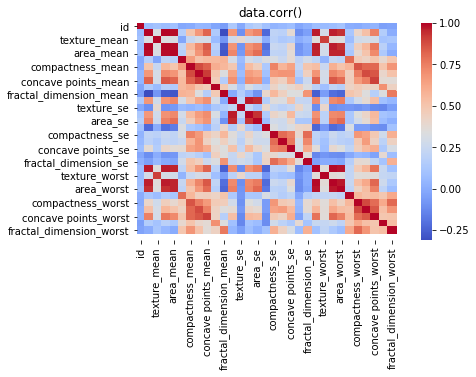

In [11]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('data.corr()')

In [12]:
data.drop('Unnamed: 32',inplace=True,axis=1)

In [13]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

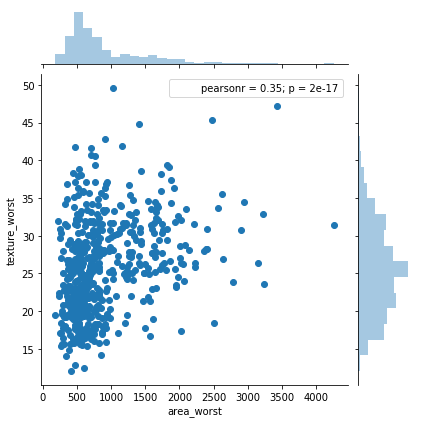

In [15]:
sns.jointplot(x='area_worst',y='texture_worst',data=data)

In [16]:
data['diagnosis'].value_counts

<bound method IndexOpsMixin.value_counts of 0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object>

In [17]:
data_dia = pd.get_dummies(data['diagnosis'],drop_first=200)
data_dia.head()

,M
0,1
1,1
2,1
3,1
4,1


In [18]:
old_data = data.copy()
data.drop(['diagnosis'],axis=1,inplace=True)
x=data.drop(['id'],axis=1,inplace=True)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
q=data.drop(["perimeter_mean","area_mean","perimeter_se","area_se","perimeter_worst","area_worst"],axis=1,inplace=True)

In [20]:
import math
peri_mean=data["radius_mean"]*2*(math.pi)
ar_mean=data["radius_mean"]**2*(math.pi)
peri_se=data["radius_se"]*2*(math.pi)
ar_se=data["radius_se"]**2*(math.pi)
peri_worst=data["radius_worst"]*2*(math.pi)
ar_worst=data["radius_worst"]**2*(math.pi)

In [21]:
data=pd.concat([data,peri_mean,ar_mean,peri_se,ar_se,peri_worst,ar_worst],axis=1)

In [22]:
data.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_mean,radius_mean,radius_se,radius_se,radius_worst,radius_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.7119,0.2654,0.4601,0.11890,113.034504,1016.745361,6.880088,3.766848,159.467243,2023.639315
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.2416,0.1860,0.2750,0.08902,129.245122,1329.286077,3.414911,0.928002,157.016801,1961.924926
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.4504,0.2430,0.3613,0.08758,123.715919,1217.983220,4.684743,1.746472,148.094678,1745.295777
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.6869,0.2575,0.6638,0.17300,71.753976,409.715204,3.113947,0.771636,93.682293,698.401494
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.4000,0.1625,0.2364,0.07678,127.485830,1293.343744,4.757628,1.801238,141.622997,1596.091174


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 non-null float64
fractal_dimension_se       569 non-null float64
radius_worst               569 non-null float64
texture_worst              569 non-null float64
smoothness_worst           569 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1410834E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E141F3DF98>]], dtype=object)

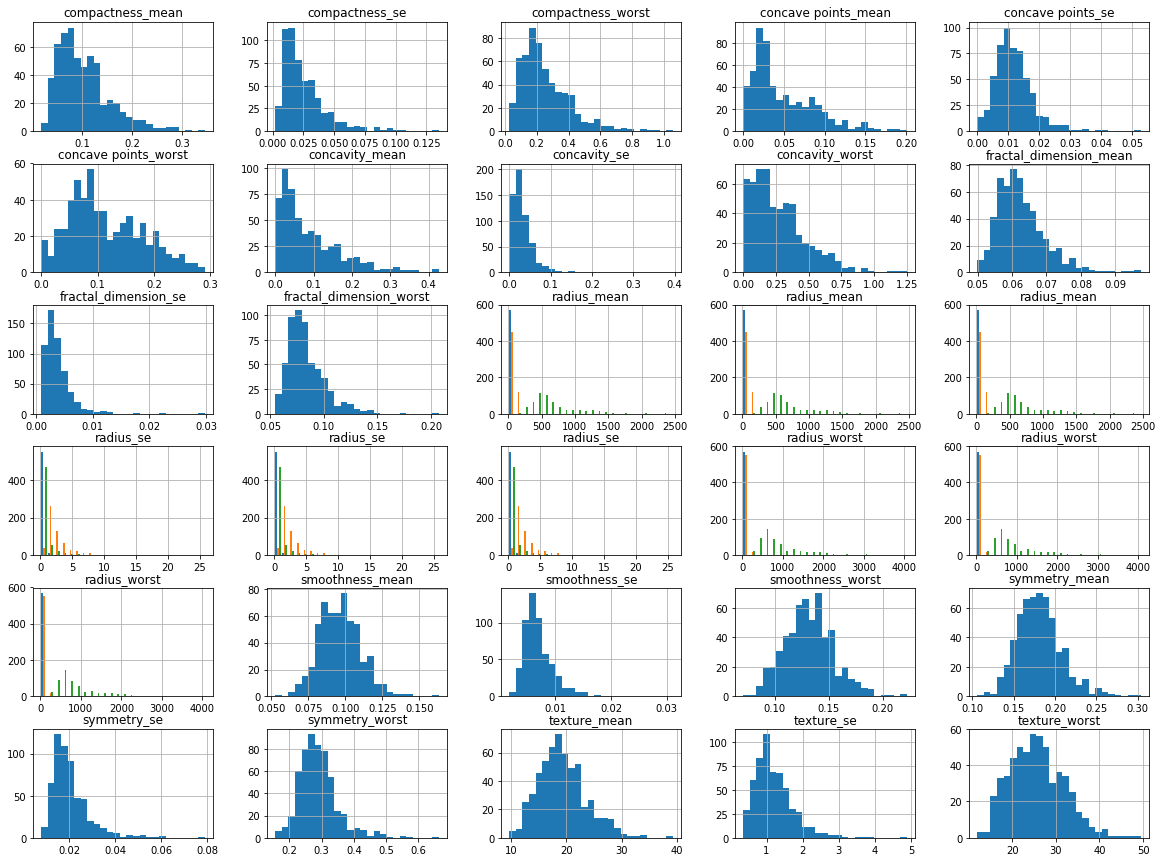

In [24]:
data.hist(bins=25,figsize=(20,15))

In [25]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [26]:
type(data_dia)

pandas.core.frame.DataFrame

In [27]:
type(data)

pandas.core.frame.DataFrame

In [28]:
data=pd.concat([data,data_dia],axis=1)

In [29]:
data.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_mean,radius_mean,radius_se,radius_se,radius_worst,radius_worst,M
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.2654,0.4601,0.11890,113.034504,1016.745361,6.880088,3.766848,159.467243,2023.639315,1
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.1860,0.2750,0.08902,129.245122,1329.286077,3.414911,0.928002,157.016801,1961.924926,1
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.2430,0.3613,0.08758,123.715919,1217.983220,4.684743,1.746472,148.094678,1745.295777,1
3,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.2575,0.6638,0.17300,71.753976,409.715204,3.113947,0.771636,93.682293,698.401494,1
4,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.1625,0.2364,0.07678,127.485830,1293.343744,4.757628,1.801238,141.622997,1596.091174,1


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('M',axis=1),                                                     data['M'], test_size=0.20, 
                                                   random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
logmodel = RandomForestClassifier()
logmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
predicted =  logmodel.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
print(confusion_matrix(y_test, predicted))

[[70  1]
 [ 3 40]]


In [39]:
from sklearn.metrics import recall_score,precision_score,f1_score

print(recall_score(y_test,predicted))



0.93023255814


In [40]:
print(precision_score(y_test,predicted))

0.975609756098


In [41]:
print(f1_score(y_test,predicted))

0.952380952381


In [42]:
data

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_mean,radius_mean,radius_se,radius_se,radius_worst,radius_worst,M
0,17.990,10.38,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,...,0.26540,0.4601,0.11890,113.034504,1016.745361,6.880088,3.766848,159.467243,2023.639315,1
1,20.570,17.77,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,...,0.18600,0.2750,0.08902,129.245122,1329.286077,3.414911,0.928002,157.016801,1961.924926,1
2,19.690,21.25,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,...,0.24300,0.3613,0.08758,123.715919,1217.983220,4.684743,1.746472,148.094678,1745.295777,1
3,11.420,20.38,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,...,0.25750,0.6638,0.17300,71.753976,409.715204,3.113947,0.771636,93.682293,698.401494,1
4,20.290,14.34,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,...,0.16250,0.2364,0.07678,127.485830,1293.343744,4.757628,1.801238,141.622997,1596.091174,1
5,12.450,15.70,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,...,0.17410,0.3985,0.12440,78.225657,486.954715,2.101725,0.351514,97.200877,751.848781,1
6,18.250,19.98,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,...,0.19320,0.3063,0.08368,114.668132,1046.346703,2.806699,0.626876,143.759280,1644.606161,1
7,13.710,20.83,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,...,0.15560,0.3196,0.11510,86.142471,590.506636,3.666239,1.069625,107.191141,914.340436,1
8,13.000,21.82,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,...,0.20600,0.4378,0.10720,81.681409,530.929158,1.924540,0.294743,97.326540,753.794055,1
9,12.460,24.04,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,...,0.22100,0.4366,0.20750,78.288489,487.737286,1.869876,0.278238,94.813266,715.366094,1


In [43]:
y=pd.concat([data,x],axis=1)

In [44]:
y.to_csv('submit.csv',index=False)